In [ ]:
!git clone -b master --single-branch https://github.com/aspuru-guzik-group/GA.git --depth 1

Cloning into 'GA'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 24 (delta 0), reused 18 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 22.62 MiB | 9.38 MiB/s, done.


In [ ]:
!pip install selfies
!pip install tensorboardX
!pip install rdkit
!pip install py3dmol

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.1 MB/s eta 0:00:00


In [ ]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from selfies import decoder
import time
import multiprocessing
import torch
from tensorboardX import SummaryWriter
from selfies import encoder
import pandas as pd
from IPython.display import Image
from IPython.core.display import HTML
import py3Dmol
import math

In [ ]:
# Set the maximum number of molecules to display
IPythonConsole.maxMols = 1000

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1yBNC3GSctNmX7hskdXySUqaYmJYHonYc?usp=sharing)

# **Week 10 - Genetic Algorithms**

## **Abstract**

1. **Introduction to Genetic Algorithms**:
Genetic algorithms (GAs) are search heuristics that mimic the process of natural evolution, leveraging the mechanisms of selection, crossover, and mutation to find optimal or near-optimal solutions to complex problems. These algorithms are particularly well-suited for optimization and search problems.

2. **Literature Review**: 'Augmenting Genetic Algorithms with Deep Neural Networks for Exploring the Chemical Space' by [Aspuru-Guzik group](https://arxiv.org/pdf/1909.11655.pdf).The paper presents a novel genetic algorithm (GA) that is augmented with a deep neural network discriminator to enhance molecular design, demonstrating an ability to generate diverse and high-quality molecular structures efficiently without the need for domain-specific mutation or crossover rules.

3. **Mutation of Theobromine**: The active compound in chocolate, Theobromine was mutated using the Genetic Algorithm to visualize analogues.



>### **References: Essential Resources for Further Learning**
>
>- **Augmenting Genetic Algorithms with Deep Neural Networks for Exploring the Chemical Space**: [Research Paper](https://arxiv.org/pdf/1909.11655.pdf)
>- **SELFIES**: [GitHub](https://github.com/aspuru-guzik-group/selfies)
>- **What Are Genetic Algorithms? Working, Applications, and Examples**: [Online Article](https://www.spiceworks.com/tech/artificial-intelligence/articles/what-are-genetic-algorithms/)


Feel free to explore these resources to deepen your understanding of data visualization, data management, and computational tools in Chemistry.





# **Mutation of Theobromine:**

Theobromine, sometimes known as xantheose, is a bitter-tasting alkaloid derived from the cacao plant. It's found not just in chocolate, but also in tea leaves and the kola nut, with various applications in the food and cosmetic industries due to its properties.

In [ ]:
# Define the SMILES string for Theobromine
theo_smiles = 'CN1C=NC2=C1C(=O)NC(=O)N2C'

# Convert SMILES to a molecule object and generate 3D coordinates
theo_molecule = Chem.MolFromSmiles(theo_smiles)
theo_molecule = Chem.AddHs(theo_molecule)
AllChem.EmbedMolecule(theo_molecule, AllChem.ETKDG())

# Use py3Dmol for 3D visualization
view = py3Dmol.view(width=1400, height=400)
view.addModel(Chem.MolToMolBlock(theo_molecule), format="mol")
view.setStyle({'stick': {}})
view.zoomTo()
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

> Note the similarity of Theobromine and Caffeine's structure.

## **Introduction to Genetic Algorithms**

Genetic Algorithms (GAs) are computational methods inspired by the principles of natural selection and genetics. They belong to the broader category of evolutionary algorithms and are particularly effective in solving optimization and search problems.

<br>

### **Key Concepts of Genetic Algorithms**

1. **Population and Chromosomes**: A GA operates on a population of potential solutions, each represented as a chromosome. Traditionally, chromosomes are binary strings, but other formats like trees or graphs are also used.

2. **Fitness Function**: Each solution's fitness is evaluated based on how well it solves the problem. This function varies depending on the specific problem.

3. **Selection**: Solutions are selected for reproduction based on their fitness. The fitter the solution, the higher its chances of being selected, ensuring the propagation of better traits.

4. **Genetic Operators**: The core operations in GAs are crossover (recombination) and mutation. Crossover combines the features of parent solutions to produce new offspring, while mutation introduces random changes to some solutions, helping maintain genetic diversity.

5. **Termination**: The algorithm iteratively improves the population of solutions and typically terminates when a satisfactory solution is found or a set number of generations have been processed.

<!DOCTYPE html>
<html>
<head>
    <style>
        .centered-image {
            display: block;
            margin-left: auto;
            margin-right: auto;
            width: 50%;
        }
    </style>
</head>
<body>

<a href="https://towardsdatascience.com/genetic-algorithms-for-natural-language-processing-b055aa7c14e9" target="_blank">
    <img src="https://miro.medium.com/v2/resize:fit:1128/1*LOZRy1IXC15B7uiakDkrzQ.gif"
         alt="Genetic algorithm training - Blue arrows avoid green rectangle"
         class="centered-image">
</a>

<br>
<figcaption align = "center"><b>Figure 1 - Genetic algorithm training - Blue arrows avoid green rectangle. Figure from Michael Berk.</b></figcaption>

</body>
</html>

<br>

## **Natural Selection Recreated in Machine Learning**

The concept of natural selection is effectively replicated in the world of machine learning through Genetic Algorithms (GAs). Here's how:

1. **Survival of the Fittest**: In nature, organisms that are better adapted to their environment are more likely to survive and reproduce. In GAs, solutions with higher fitness scores are more likely to be chosen for reproduction.

2. **Reproduction and Genetic Operators**: Natural reproduction involves combining genetic material from two parents, similar to the crossover operation in GAs. Likewise, mutations in biological organisms introduce new genetic variations, paralleling the mutation operation in GAs.

3. **Evolution Over Generations**: In nature, species evolve over generations, with advantageous traits becoming more prevalent. GAs simulate this process through iterative cycles of selection, crossover, and mutation, improving solution quality over time.

This comparison highlights how the principles of natural evolution are ingeniously applied in machine learning to solve complex optimization problems.



# **Literature Review - Augmenting Genetic Algorithms with Deep Neural Networks for Exploring the Chemical Space**


The paper "Augmenting Genetic Algorithms with Deep Neural Networks for Exploring the Chemical Space" integrates the robustness of genetic algorithms (GAs) with the advanced pattern recognition capabilities of deep neural networks (DNNs), especially in the context of molecular design.

### **Key Innovations and Methodology**

1. **Integration of DNNs in GAs**:
    - The GA is enhanced with a neural network-based adaptive penalty. This addition improves the diversity of generated molecules by encouraging exploratory behavior.
    - A discriminator model (DNN) is trained and integrated into the GA's selection process, steering the GA towards more diverse molecular structures.

2. **Use of SELFIES for Molecular Representation**:
    - SELFIES (Self-referencing Embedded Strings) are utilized for representing molecules. This approach ensures the validity of molecular structures during the mutation process.
    - The reliance on SELFIES simplifies the GA operation by eliminating the need for complex, expert-defined rules for mutation and crossover.

3. **Optimization Process**:
    - The GA begins with simple methane molecules and competes favorably in optimization tasks for molecular design compared to other generative models.
    - Through the GA-DNN combination, the problem of stagnation common in GAs is effectively addressed, enhancing the algorithm's long-term performance.

<br>

<!DOCTYPE html>
<html>
<head>
    <style>
        .centered-image {
            display: block;
            margin-left: auto;
            margin-right: auto;
            width: 50%;
        }
    </style>
</head>
<body>

<a href="https://www.researchgate.net/figure/SMILES-SMARTS-InChI-and-InChIKey-concepts-Examples-for-the-illustration-of-basic_fig1_344906202" target="_blank">
    <img src="https://githubraw.com/aspuru-guzik-group/GA/paper_results/readme_docs/mol_view.gif"
         alt="Visualization of molecular progress with GA"
         class="centered-image">
</a>

<br>
<figcaption align = "center"><b>Figure 2 - Visualization of molecular progress with GA. Figure by Aspuru-Guzik group repo.</b></figcaption>

</body>
</html>

### **Implications and Applications**

- **Increased Diversity and Efficiency**: The methodology enhances the ability of the genetic algorithm to explore a broader and more diverse chemical space efficiently.
- **Interdisciplinary Potential**: Although focused on chemical design, the principles and methodology have potential applications in other scientific domains where optimization is crucial.
- **Data Interpretation and Design Principles**: The approach allows for increased interpretability of genetic algorithms, leading to the derivation of new design principles for molecular structures.



> The following code has been adapted from the [Aspuru-Guzik group GitHub](https://github.com/aspuru-guzik-group/GA/tree/paper_results). Read the [paper](https://arxiv.org/pdf/1909.11655.pdf) to learn more.

> Note: The beta is meant to be 0 for this experiment. The discriminator predictions were not used to calculate the fitness.



In [ ]:
# The following code has been adapted from the Aspuru-Guzik group GitHub --> https://github.com/aspuru-guzik-group/GA/tree/paper_results
# Depending on the hyperparameters & layers, this code could take upto 8 minutes.

import os

# Define the path to the directory
new_directory = '/content/GA'

# Change the current working directory
os.chdir(new_directory)

# Verify the change
print("Current Working Directory:", os.getcwd())


import sys

# Directory where your modules are located
modules_path = '/content/GA'

# Add this directory to the system path
sys.path.append(modules_path)

# Now you can import your modules
import discriminator as D
import evolution_functions as evo
import generation_props as gen_func


from rdkit.Chem.Draw import IPythonConsole

# Set the maximum number of molecules to display
IPythonConsole.maxMols = 110

def initiate_ga(num_generations,            generation_size,    starting_selfies,max_molecules_len,
                disc_epochs_per_generation, disc_enc_type,      disc_layers,     training_start_gen,
                device,                     properties_calc_ls, num_processors,  beta, max_fitness_collector, impose_time_adapted_pen):



    # Obtain starting molecule
    starting_smiles = evo.sanitize_multiple_smiles([decoder(selfie) for selfie in starting_selfies])


    # Recording Collective results
    smiles_all         = []    # all SMILES seen in all generations
    selfies_all        = []    # all SELFIES seen in all generation
    smiles_all_counter = {}    # Number of times a SMILE string is recorded in GA run


    # Initialize a Discriminator
    discriminator, d_optimizer, d_loss_func = D.obtain_initial_discriminator(disc_enc_type, disc_layers, max_molecules_len, device)
    print(discriminator, d_optimizer, d_loss_func )

    # Read in the Zinc data set
    molecules_reference = evo.read_dataset_encoding(disc_enc_type)

    molecules_reference = dict.fromkeys(molecules_reference, '') # convert the zinc data set into a dictionary

    # Set up Generation Loop
    total_time = time.time()
    for generation_index in range(1, num_generations+1):
        print("   ###   On generation %i of %i"%(generation_index, num_generations))
        start_time = time.time()


        # Obtain molecules from the previous generation
        smiles_here, selfies_here = gen_func.obtain_previous_gen_mol(starting_smiles,   starting_selfies, generation_size,
                                                                     generation_index,  selfies_all,      smiles_all)

        # Calculate fitness of previous generation (shape: (generation_size, ))
        fitness_here, order, fitness_ordered, smiles_ordered, selfies_ordered = gen_func.obtain_fitness(disc_enc_type,      smiles_here,   selfies_here,
                                                                                                        properties_calc_ls, discriminator, generation_index,
                                                                                                        max_molecules_len,  device,        generation_size,
                                                                                                        num_processors,     writer,        beta,
                                                                                                        image_dir,          data_dir,      max_fitness_collector, impose_time_adapted_pen)

        # Obtain molecules that need to be replaced & kept
        to_replace, to_keep = gen_func.apply_generation_cutoff(order, generation_size)

        # Obtain new generation of molecules
        smiles_mutated, selfies_mutated = gen_func.obtain_next_gen_molecules(order,           to_replace,     to_keep,
                                                                             selfies_ordered, smiles_ordered, max_molecules_len)
        # Record in collective list of molecules
        smiles_all, selfies_all, smiles_all_counter = gen_func.update_gen_res(smiles_all, smiles_mutated, selfies_all, selfies_mutated, smiles_all_counter)


        # Obtain data for training the discriminator (Note: data is shuffled)
        dataset_x, dataset_y = gen_func.obtain_discrm_data(disc_enc_type, molecules_reference, smiles_mutated, selfies_mutated, max_molecules_len, num_processors, generation_index)
        # Train the discriminator (on mutated molecules)
        if generation_index >= training_start_gen:
            discriminator = D.do_x_training_steps(dataset_x, dataset_y, discriminator, d_optimizer, d_loss_func , disc_epochs_per_generation, generation_index-1, device, writer, data_dir)
            D.save_model(discriminator, generation_index-1, saved_models_dir) # Save the discriminator

        print('Generation time: ', round((time.time()-start_time), 2), ' seconds')

    print('Total time: ', round((time.time()-total_time)/60, 2), ' mins')
    print('Total number of unique molecules: ', len(smiles_all_counter))
    return smiles_all_counter


if __name__ == '__main__':

    beta_preference = [0]
    num_iterations  = 1

    results_dir = evo.make_clean_results_dir()

    exper_time = time.time()
    for i in range(num_iterations):
        for beta in beta_preference:

            max_fitness_collector = []
            image_dir, saved_models_dir, data_dir = evo.make_clean_directories(beta, results_dir, i) # clear directories

            # Initialize new TensorBoard writers
            torch.cuda.empty_cache()
            writer = SummaryWriter()

            # Initiate the Genetic Algorithm
            smiles_all_counter = initiate_ga(    num_generations            = 50,
                                                 generation_size            = 400,
                                                 starting_selfies           = [encoder('CC12CCN(C1N(C3=C2C=C(C=C3)OC(=O)NC)C)C')],
                                                 max_molecules_len          = 75,
                                                 disc_epochs_per_generation = 10,
                                                 disc_enc_type              = 'properties_rdkit',         # 'selfies' or 'smiles' or 'properties_rdkit'
                                                 disc_layers                = [100, 10],
                                                 training_start_gen         = 0,                          # generation index to start training discriminator
                                                 device                     = 'cpu',
                                                 properties_calc_ls         = ['logP', 'SAS', 'RingP'],   # None: No properties ; 'logP', 'SAS', 'RingP', 'QED'
                                                 num_processors             = multiprocessing.cpu_count(),
                                                 beta                       = beta,
                                                 max_fitness_collector      = max_fitness_collector,
                                                 impose_time_adapted_pen    = True
                                            )

    print('Total Experiment time: ', (time.time()-exper_time)/60, ' mins')

Current Working Directory: /content/GA
Net(
  (hidden): ModuleList(
    (0): Linear(in_features=51, out_features=100, bias=True)
    (1): Linear(in_features=100, out_features=10, bias=True)
  )
  (predict): Linear(in_features=10, out_features=1, bias=True)
) Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0001
) BCELoss()
   ###   On generation 1 of 50
beta value:  0
Generation time:  3.83  seconds
   ###   On generation 2 of 50
beta value:  0


/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


Failed to produce image!
Generation time:  7.7  seconds
   ###   On generation 3 of 50
beta value:  0
Failed to produce image!
Generation time:  6.79  seconds
   ###   On generation 4 of 50
beta value:  0
Failed to produce image!
Generation time:  7.73  seconds
   ###   On generation 5 of 50
beta value:  0
Failed to produce image!
Generation time:  5.71  seconds
   ###   On generation 6 of 50
beta value:  0
Failed to produce image!
Generation time:  5.84  seconds
   ###   On generation 7 of 50
beta value:  0
Failed to produce image!
Generation time:  5.28  seconds
   ###   On generation 8 of 50
beta value:  0
Failed to produce image!
Generation time:  6.21  seconds
   ###   On generation 9 of 50
beta value:  0
Failed to produce image!
Generation time:  5.23  seconds
   ###   On generation 10 of 50
beta value:  0
Failed to produce image!
Generation time:  6.79  seconds
   ###   On generation 11 of 50
beta value:  0
Failed to produce image!
Generation time:  5.91  seconds
   ###   On gen

## **Code explanation:**

### **Exploring the GA-D System Architecture**

<br>

<!DOCTYPE html>
<html>
<head>
    <style>
        .centered-image {
            display: block;
            margin-left: auto;
            margin-right: auto;
            width: 50%;
        }
    </style>
</head>
<body>

<a href="https://www.semanticscholar.org/paper/Augmenting-Genetic-Algorithms-with-Deep-Neural-for-Nigam-Friederich/cbe6238afd650965a69eb77bc6eb07c183a10351" target="_blank">
    <img src="https://www.researchgate.net/profile/Akshatkumar-Nigam/publication/336056585/figure/fig7/AS:830494828658690@1575016805941/Overview-of-our-hybrid-structure-which-augments-genetic-algorithms-with-ML-based-neural.ppm"
         alt="Exploring the GA-D System Architecture"
         class="centered-image">
</a>

<br>
<figcaption align = "center"><b>Figure 3 - Exploring the GA-D System Architecture. Figure by Aspuru-Guzik group repo.</b></figcaption>

</body>
</html>

The diagram outlines a hybrid machine learning approach that augments a genetic algorithm (GA) with a deep neural network discriminator (D), aiming to enhance the exploration and optimization of chemical spaces.

### **Generator: Genetic Algorithm**

The generator is a GA which produces a set of molecule candidates \( m \):

### **Properties Evaluation: \( J(m) \)**

For each molecule, a set of properties is evaluated, quantifying how well it solves the optimization problem:

$$
J(m) = \text{Properties Evaluation Function}
$$

### **Fitness Evaluation: \( F(m) \)**

The fitness function \( F(m) \) for each molecule is calculated by combining its properties score \( J(m) \) with the discriminator score \( D(m) \), moderated by a coefficient $\ \beta \$:

$$
F(m) = J(m) + \beta \cdot D(m)
$$

Here, $\ \beta \$ balances the contribution of the discriminator to the fitness score.

### **Discriminator: Neural Network**

The discriminator is a neural network that scores the generated molecules by comparing them with a reference dataset, promoting diversity in the solutions:

$$
\text{Discriminator} : \text{Neural Network Score}
$$

### **Dataset Molecules**

The dataset provides a reference of known molecules against which the discriminator scores the newly generated molecules:

$$
\text{Dataset} : \text{Known Molecules}
$$

This architecture allows the GA-D system to utilize the principles of evolution, along with the pattern recognition capabilities of neural networks, to efficiently search for novel molecular designs.

<br>

## **Importing Discriminator, Evolution_functions, and Generation_props**
The functions were imported from the [Aspuru-Guzik group GitHub](https://github.com/aspuru-guzik-group/GA/tree/paper_results).Since this repository is not downloadable through pip, the necessary code was cloned using the following code:


```
!git clone -b master --single-branch https://github.com/aspuru-guzik-group/GA.git --depth 1
```





In [ ]:
def read_and_parse_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Splitting the line by commas and then by colon to get key-value pairs
            fields = line.strip().split(', ')
            entry = {}
            for field in fields:
                key, value = field.split(': ', 1)
                # Converting string representation of lists and numbers to actual lists and numbers
                if value.startswith('[') and value.endswith(']'):
                    value = eval(value)
                elif value.replace('.', '', 1).isdigit():
                    value = float(value)
                entry[key] = value
            data.append(entry)
    return data

# File path
file_path = '/content/GA/results/results_0_0/best_in_generations.txt'

# Read and parse the file
parsed_data = read_and_parse_file(file_path)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(parsed_data)

# Display the first few rows of the DataFrame
df.head()


,index,smile,fitness,logP,sas,ringP,discrm
0,1.0,CNC(=O)Oc1ccc2c(c1)C1(C)CCN(C)C1N2C,-0.7986434170646366,1.7739,3.441722,0.0,[0.0]
1,2.0,CCN(c1ccc(OC(=O)NC)cc1)C1C2=C1CC2,0.69874,2.7037,2.743445,0.0,[0.5059698]
2,3.0,CC=CC=CC#CCC=NCN(C)c1ccc(OCC=CC=CC)cc1,1.250106,5.1880,3.742996,0.0,[0.49289745]
3,4.0,CCCCNCCC,1.319014,1.7861,1.689862,0.0,[0.48335057]
4,5.0,CCCCNCCC,1.319014,1.7861,1.689862,0.0,[0.48195577]


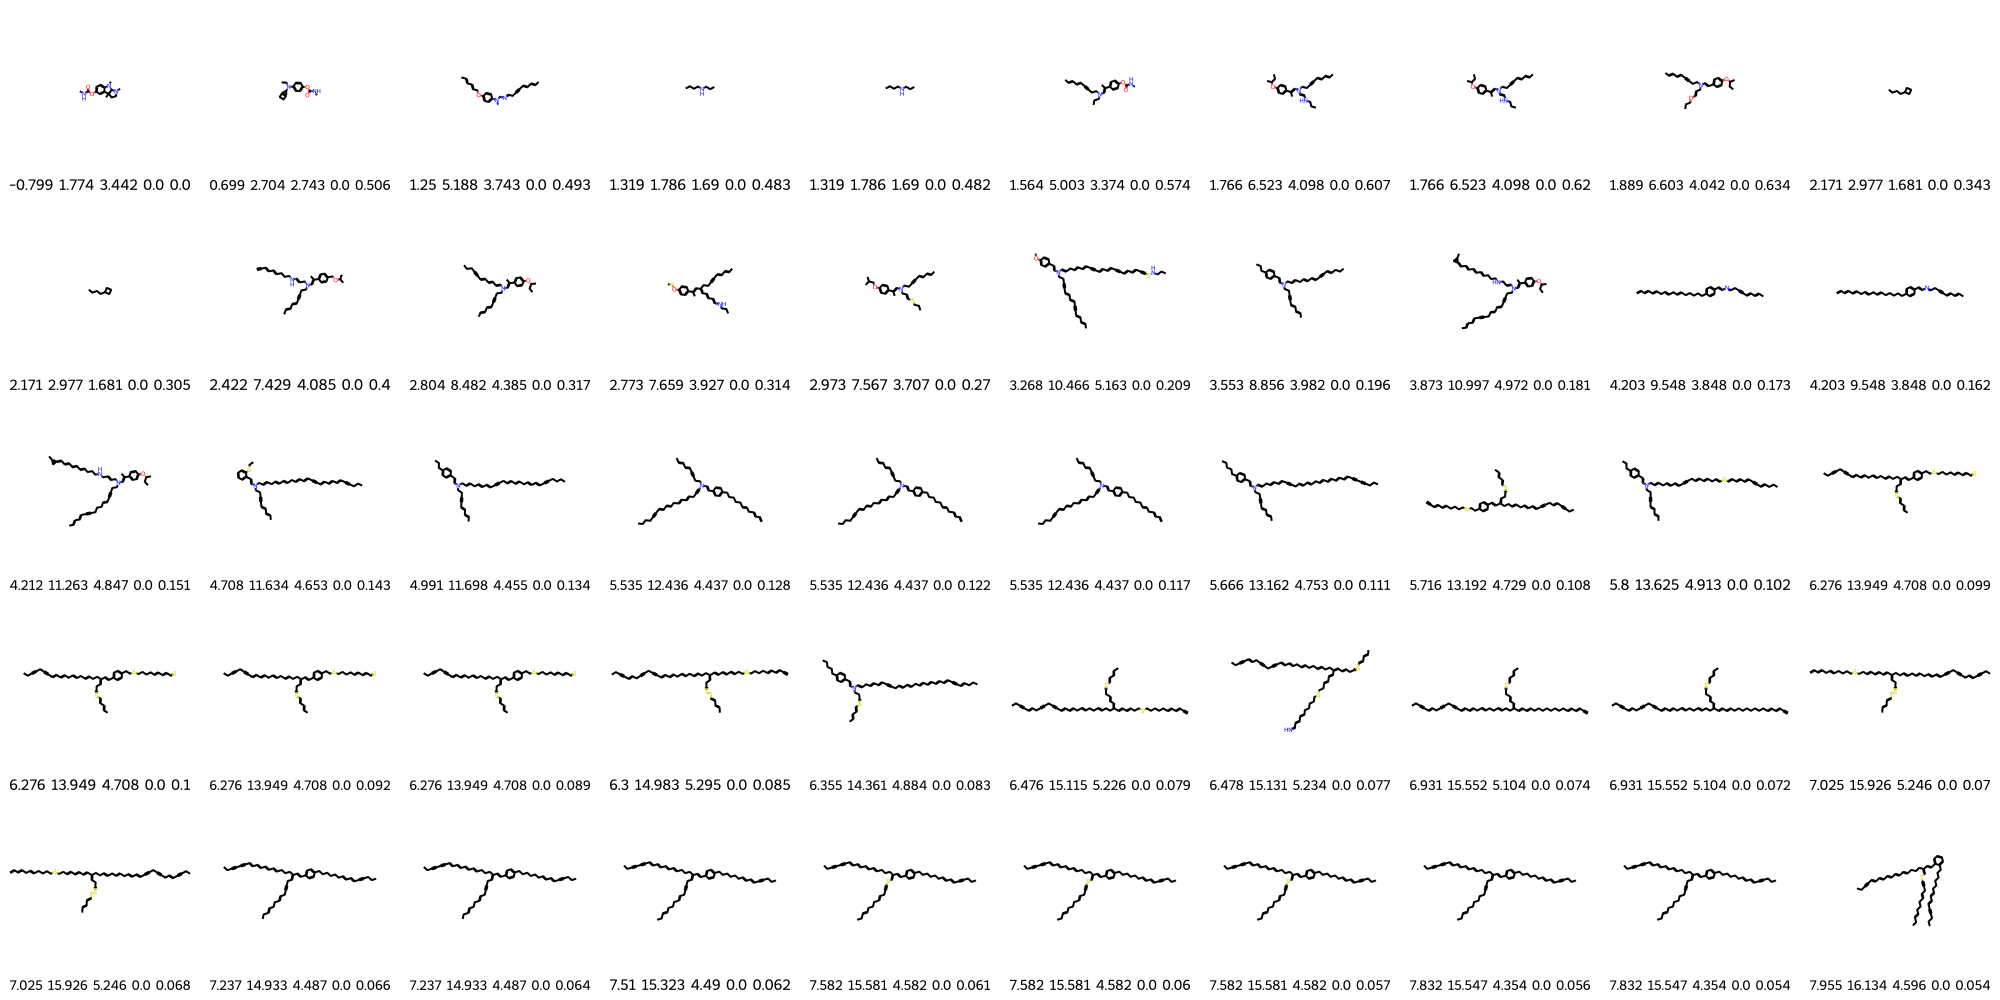

In [ ]:
# Function to create an image of molecules
def create_50_mol_image(mol_list, file_name, fitness, logP, SAS, RingCount, discr_scores):
    assert len(mol_list) <= 100
    for i, m in enumerate(mol_list):
        m.SetProp('_Name', '%s %s %s %s %s' % (round(fitness[i], 3), round(logP[i], 3), round(SAS[i], 3), round(RingCount[i], 3), round(discr_scores[i][0], 3)))
    try:
        img = Draw.MolsToGridImage(mol_list, molsPerRow=10, subImgSize=(200,200), legends=[x.GetProp("_Name") for x in mol_list], returnPNG=False)
        img.save(file_name)
    except Exception as e:
        print('Failed to produce image:', e)


# Convert columns to floats if they are not already
df['fitness'] = df['fitness'].astype(float)
df['logP'] = df['logP'].astype(float)
df['sas'] = df['sas'].astype(float)
df['ringP'] = df['ringP'].astype(float)

# Extract SMILES and other properties
smiles = df[' smile'].tolist()
mol_list = [Chem.MolFromSmiles(smile) for smile in smiles[:50]]
fitness = df['fitness'].tolist()[:100]
logP = df['logP'].tolist()[:100]
SAS = df['sas'].tolist()[:100]
RingCount = df['ringP'].tolist()[:100]
discr_scores = [x if isinstance(x, list) else [x] for x in df['discrm'].tolist()[:50]]


# File name for the image
file_name = "molecules_grid.png"

# Generate and save the image
create_50_mol_image(mol_list, file_name, fitness, logP, SAS, RingCount, discr_scores)

# Display the image
Image(filename=file_name)


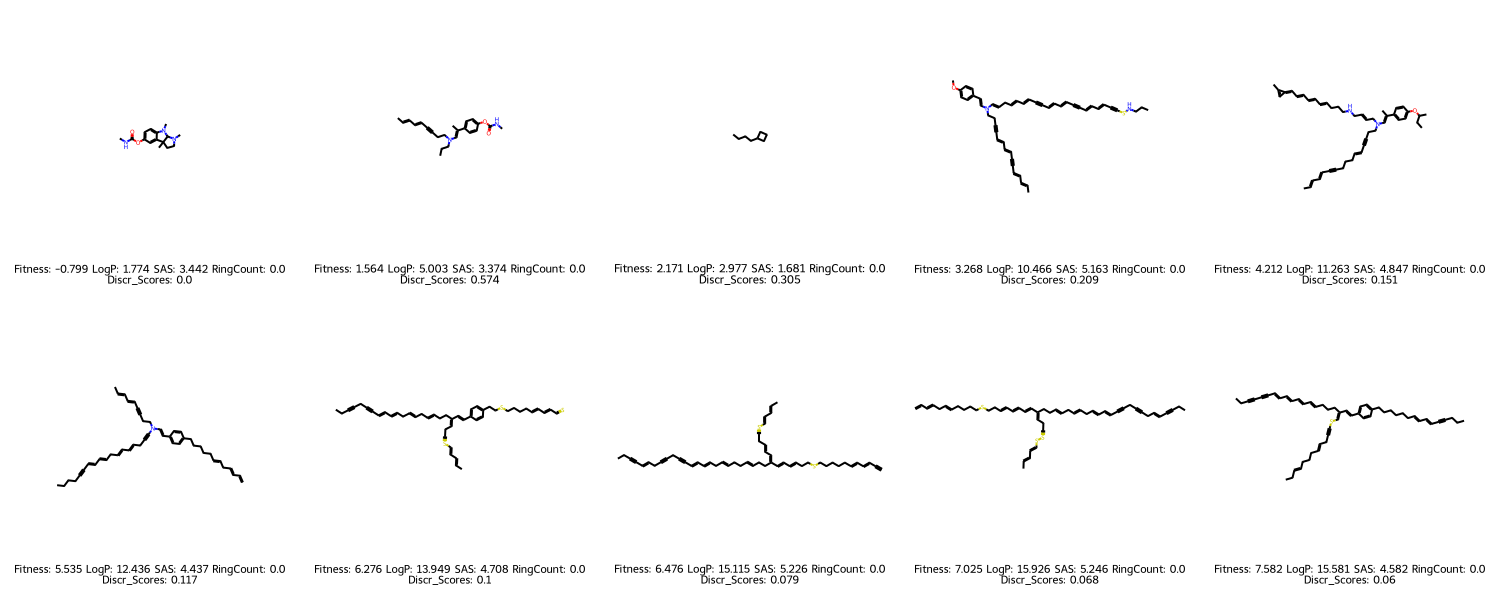

In [ ]:
# Function to create an image of molecules
def create_mol_image(mol_list, file_name, fitness, logP, SAS, RingCount, discr_scores):
    for i, m in enumerate(mol_list):
        label = f"Fitness: {round(fitness[i], 3)} LogP: {round(logP[i], 3)} SAS: {round(SAS[i], 3)} RingCount: {round(RingCount[i], 3)}\nDiscr_Scores: {round(discr_scores[i][0], 3)}"
        m.SetProp('_Name', label)
    try:
        img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(300,300), legends=[x.GetProp("_Name") for x in mol_list], returnPNG=False)
        img.save(file_name)
    except Exception as e:
        print('Failed to produce image:', e)

# Assuming df is already defined
# Convert columns to floats if they are not already
df['fitness'] = df['fitness'].astype(float)
df['logP'] = df['logP'].astype(float)
df['sas'] = df['sas'].astype(float)
df['ringP'] = df['ringP'].astype(float)

# Extract SMILES and other properties for every 4th molecule
smiles = df[' smile'].tolist()
selection_interval = 5
selected_indices = range(0, min(50, len(smiles)), selection_interval)

mol_list = [Chem.MolFromSmiles(smiles[i]) for i in selected_indices]
fitness = [df['fitness'].tolist()[i] for i in selected_indices]
logP = [df['logP'].tolist()[i] for i in selected_indices]
SAS = [df['sas'].tolist()[i] for i in selected_indices]
RingCount = [df['ringP'].tolist()[i] for i in selected_indices]
discr_scores = [df['discrm'].tolist()[i] if isinstance(df['discrm'].tolist()[i], list) else [df['discrm'].tolist()[i]] for i in selected_indices]

# File name for the image
file_name = "molecules_grid.png"

# Generate and save the image
create_mol_image(mol_list, file_name, fitness, logP, SAS, RingCount, discr_scores)

# Display the image
Image(filename=file_name)


In [ ]:
print(smiles)
smiles_dict = {index: smiles[index - 1] for index in range(1, len(smiles) + 1) if index % 5 == 0 or index == 1}

# Display the dictionary
print(smiles_dict)

['CNC(=O)Oc1ccc2c(c1)C1(C)CCN(C)C1N2C', 'CCN(c1ccc(OC(=O)NC)cc1)C1C2=C1CC2', 'CC=CC=CC#CCC=NCN(C)c1ccc(OCC=CC=CC)cc1', 'CCCCNCCC', 'CCCCNCCC', 'CC=CC=CC#CCCN(C=C(C)c1ccc(OC(=O)NC)cc1)CCC', 'CC=CC=CC#CCCN(C=CNCCC)C=C(C)c1ccc(OC(C)CC)cc1', 'CC=CC=CC#CCCN(C=CNCCC)C=C(C)c1ccc(OC(C)CC)cc1', 'CC=CC=CC#CCCN(C=Cc1ccc(OC(C)CC)cc1)CC=COCCC', 'CCCCC1CCC1', 'CCCCC1CCC1', 'C#CC=CC=CCCCNC=CCN(C=C(C)c1ccc(COC(C)C)cc1)CCC#CC=CC=CC', 'CC=CC=CC#CCCN(C=CC=CC=CC#CCCC)C=C(C)c1ccc(OC(C)CC)cc1', 'CC=CC=CC#CCCC(=CC=CC=CNCCC)C=C(C)c1ccc(OSC)cc1', 'CC=CC=CC#CCCN(C=C(C)c1ccc(OCC(C)C)cc1)CC=CSCCC', 'CC=CC=CC#CC=CC=CC#CCCN(C=CCC=CC=CC#CC=CC=CC#CC=CC=CC#CSNCCC)C=Cc1ccc(OC)cc1', 'CC=CC=CC#CCCN(C=Cc1ccc(CCC)cc1)CC=CCC=CC=CC#CC=CCCC', 'CC=CC=CC#CCC=CC=CC#CCCN(C=CCNCCCC=CC=CC=CC=C1C=C1C)C=C(C)c1ccc(OC(C)CC)cc1', 'C=CC=CC=CCC=CCC=CCCCCCc1ccc(C=CN=CCC#CC=CC=CC)cc1', 'C=CC=CC=CCC=CCC=CCCCCCc1ccc(C=CN=CCC#CC=CC=CC)cc1', 'CC=CC=CC#CCCCC=CC#CCCN(C=C(C)c1ccc(OC(C)CC)cc1)CC=CCNCCCC=CC=CC=CC=C1C=C1C', 'CC=CC=CC#CCCN(C=Cc1ccccc1

In [ ]:
# Initialize a new dictionary for the molecules
molecules_dict = {}

# Generate 3D coordinates for each molecule
for index, smiles_in in smiles_dict.items():
    mol_in = Chem.MolFromSmiles(smiles_in)
    mol = Chem.AddHs(mol_in)
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    molecules_dict[index] = mol

print(molecules_dict)

{1: <rdkit.Chem.rdchem.Mol object at 0x7a2c66c161f0>, 5: <rdkit.Chem.rdchem.Mol object at 0x7a2c66c16420>, 10: <rdkit.Chem.rdchem.Mol object at 0x7a2c66c16180>, 15: <rdkit.Chem.rdchem.Mol object at 0x7a2c66c16110>, 20: <rdkit.Chem.rdchem.Mol object at 0x7a2c66c162d0>, 25: <rdkit.Chem.rdchem.Mol object at 0x7a2c66c160a0>, 30: <rdkit.Chem.rdchem.Mol object at 0x7a2c66c16030>, 35: <rdkit.Chem.rdchem.Mol object at 0x7a2c66c15fc0>, 40: <rdkit.Chem.rdchem.Mol object at 0x7a2c66c15f50>, 45: <rdkit.Chem.rdchem.Mol object at 0x7a2c66c15ee0>, 50: <rdkit.Chem.rdchem.Mol object at 0x7a2c66c15e70>}


In [ ]:
# Determine the grid dimensions for the viewer
num_molecules = len(molecules_dict)
grid_size = int(math.ceil(math.sqrt(num_molecules)))
view = py3Dmol.view(linked=False, viewergrid=(grid_size, grid_size), width=300*grid_size, height=300*grid_size)

# Define the style
style = {'stick': {'colorscheme': 'default'}}

# Add each molecule to the grid with a label
for i, (name, mol) in enumerate(molecules_dict.items()):
    row = i // grid_size
    col = i % grid_size
    view.addModel(Chem.MolToMolBlock(mol), format="mol", viewer=(row, col))
    view.setStyle(style, viewer=(row, col))
    view.addLabel(str(name), {'position': {'x':1, 'y':1, 'z':1}, 'backgroundColor': 'black'}, viewer=(row, col))
    view.zoomTo(viewer=(row, col))

view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.